In [1]:
import torch
from matplotlib import pyplot as plt
import torchvision.transforms as transforms
from torch import Tensor

In [2]:
def load_preds(obj_file):
    f = torch.load(obj_file)
    Vo_batch, Vp_batch, preds_batch = f['Vo'], f['g_Vp'], f['g_Preds']
    return Vo_batch, Vp_batch, preds_batch

In [3]:
def plot_model_result(pred, fig_name, num_frames, n = 0, rand_idx = 0, temporal_step = 1, renorm_transform = None):
    if len(pred.shape) > 5:
        pred = pred[:, :, 0::temporal_step, ...]
    else:
        pred = pred[:, 0::temporal_step, ...]
    fig, ax = plt.subplots(1, num_frames, figsize = (num_frames, 1))
    fig.subplots_adjust(wspace=0., hspace = 0.)

    for j in range(num_frames):
        ax[j].set_axis_off()
        
        if len(pred.shape) > 5:
            img = pred[:, rand_idx, j, ...].clone()
        else:
            img = pred[:, j, :, :, :].clone()
        if renorm_transform is not None:
            img = renorm_transform(img)
        img = torch.clamp(img, min = 0., max = 1.)
        img = img[n, ...]


        img = transforms.ToPILImage()(img)
        ax[j].imshow(img, cmap = 'gray')
    fig.savefig(f'{fig_name}.pdf', bbox_inches = 'tight', dpi=300)
    #plt.close()

class VidReNormalize(object):
    def __init__(self, mean, std):
        try:
            self.inv_std = [1.0/s for s in std]
            self.inv_mean = [-m for m in mean]
            self.renorm = transforms.Compose([transforms.Normalize(mean = [0., 0., 0.],
                                                                std = self.inv_std),
                                            transforms.Normalize(mean = self.inv_mean,
                                                                std = [1., 1., 1.])])
        except TypeError:
            #try normalize for grey_scale images.
            self.inv_std = 1.0/std
            self.inv_mean = -mean
            self.renorm = transforms.Compose([transforms.Normalize(mean = 0.,
                                                                std = self.inv_std),
                                            transforms.Normalize(mean = self.inv_mean,
                                                                std = 1.)])

    def __call__(self, clip: Tensor):
        """
        Return: clip --- Tensor with shape (T, C, H, W)
        """
        T, _, _, _ = clip.shape
        for i in range(T):
            clip[i, ...] = self.renorm(clip[i, ...])

        return clip

In [66]:
#obj_file = '/u/wusifan/diffusion/CDVP_figure_files/Preds_76.pt'
obj_file = '/Tmp/sifan/diffusion/CDVP_ckpts/cdvp_city_128_sde_autoreg/test_ddpm100_sample10_first_10/Preds_44.pt'
Vo, Vp, Preds = load_preds(obj_file)

n = 12
rand_idx = 2
temporal_step = 2

renorm_transform = None

In [60]:
Vp.shape

torch.Size([32, 28, 3, 128, 128])

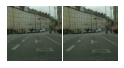

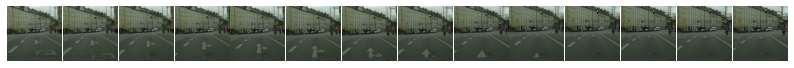

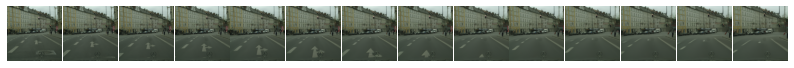

In [79]:
for n in range(20,21):
    plot_model_result(Vo, 'City_Vo_CDVP', 2, n=n, rand_idx = 0, temporal_step=1, renorm_transform=renorm_transform)
    plot_model_result(Vp, 'City_Vp_CDVP', 14, n=n, rand_idx = 0, temporal_step=temporal_step, renorm_transform=renorm_transform)
    plot_model_result(Preds, 'CDVP_City_Preds_0', 14, n=n, rand_idx = 0, temporal_step=temporal_step, renorm_transform=renorm_transform)

In [ ]:
for n in range(32):
    plot_model_result(Vp, 'City_Vp_CDVP', 7, n=n, rand_idx = 0, temporal_step=temporal_step, renorm_transform=renorm_transform)
    plot_model_result(Preds, 'CDVP_City_Preds_0', 7, n=n, rand_idx = 0, temporal_step=temporal_step, renorm_transform=renorm_transform)

In [ ]:
[ 2.0000,  2.5000,  3.0000,  3.5000,  4.0000,  4.5000,  5.0000,  5.5000, 6.0000,  6.5000,  7.0000,  7.5000,  8.0000,  8.5000,  9.0000,  9.5000, 10.0000,  10.5000,  11.0000]

In [50]:
Vp.shape

torch.Size([1, 28, 3, 128, 128])

In [51]:
Vo.shape

torch.Size([1, 2, 3, 128, 128])

In [53]:
gray_fill = torch.ones_like(Vp)*0.5
filled_Vp = torch.ones((1, 56, 3, 128, 128))
for i in range(28):
    filled_Vp[:, 2*i, ...] = Vp[:, i, ...]
    filled_Vp[:, 2*i+1, ...] = gray_fill[:, i, ...]

<ipython-input-3-fdccf399bef5>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, num_frames, figsize = (num_frames, 1))


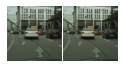

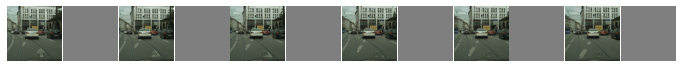

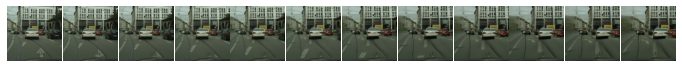

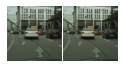

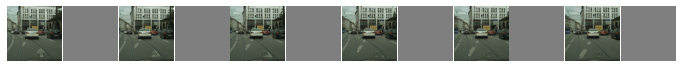

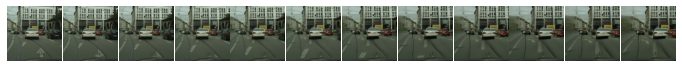

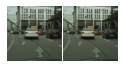

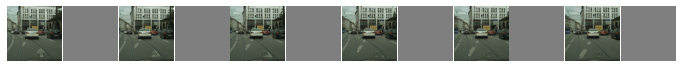

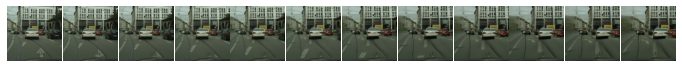

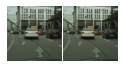

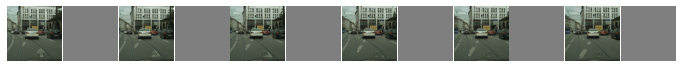

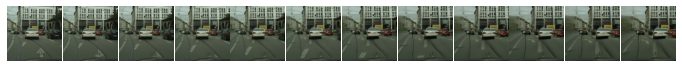

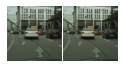

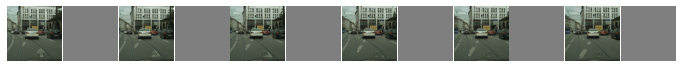

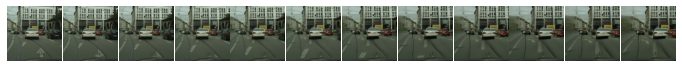

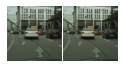

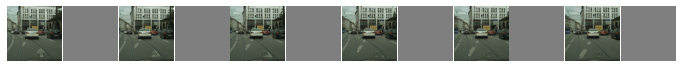

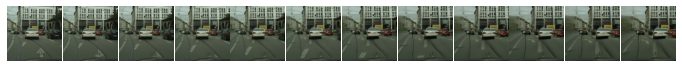

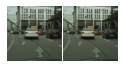

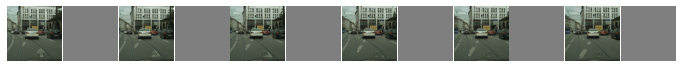

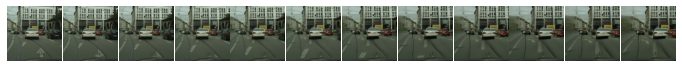

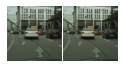

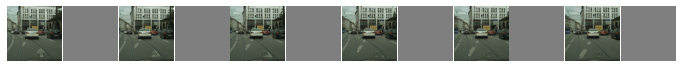

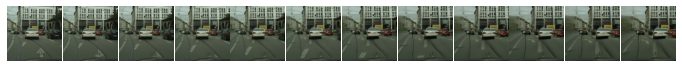

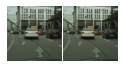

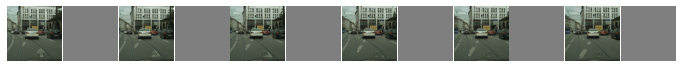

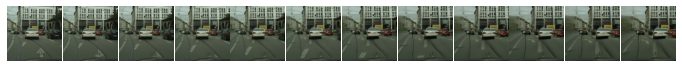

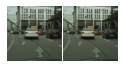

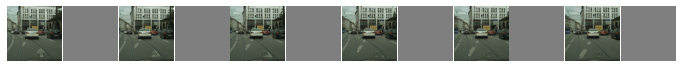

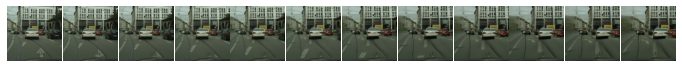

In [56]:
for n in range(10):
    plot_model_result(Vo, 'City_Vo_CDVP', 2, n=0, rand_idx = 0, temporal_step=1, renorm_transform=renorm_transform)
    plot_model_result(filled_Vp, 'City_Vp_CDVP', 12, n=0, rand_idx = 0, temporal_step=3, renorm_transform=renorm_transform)
    plot_model_result(Preds, 'CDVP_City_Preds_0', 12, n=0, rand_idx = 7, temporal_step=3, renorm_transform=renorm_transform)

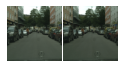

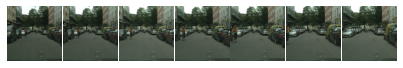

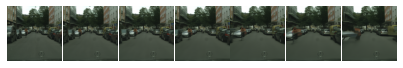

In [59]:
plot_model_result(Vo, 'City_Vo_CDVP', 2, n=n, rand_idx = rand_idx, temporal_step=1, renorm_transform=renorm_transform)
plot_model_result(Vp, 'City_Vp_CDVP',7, n=n, rand_idx = rand_idx, temporal_step=temporal_step, renorm_transform=renorm_transform)
plot_model_result(Preds, 'CDVP_City_Preds_0', 7, n=n, rand_idx = rand_idx, temporal_step=temporal_step, renorm_transform=renorm_transform)

In [ ]:
for n in range(32):
    plot_model_result(Vo, 'City_Vo_CDVP', 2, n=n, rand_idx = rand_idx, temporal_step=1, renorm_transform=renorm_transform)

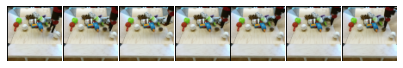

In [71]:
plot_model_result(Preds, 'CDVP_BAIR_Preds_1', 7, n=n, rand_idx = 1, temporal_step=temporal_step, renorm_transform=renorm_transform)

In [4]:
obj_file = '/u/wusifan/diffusion/CDVP_figure_files/mcvd_city_Preds_40.pt'
Vo, Vp, Preds = load_preds(obj_file)

n = 2
rand_idx = 2
temporal_step = 1

renorm_transform = None
#renorm_transform = VidReNormalize((0.61749697, 0.6050092, 0.52180636), (2.1824553, 2.1553133, 1.9115673))

In [5]:
print(Vo.shape)

torch.Size([16, 2, 3, 128, 128])


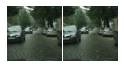

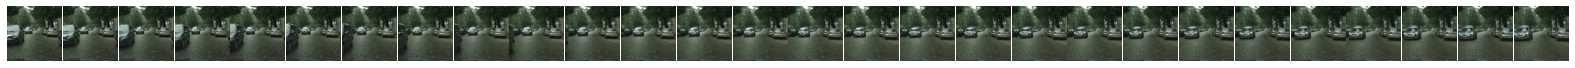

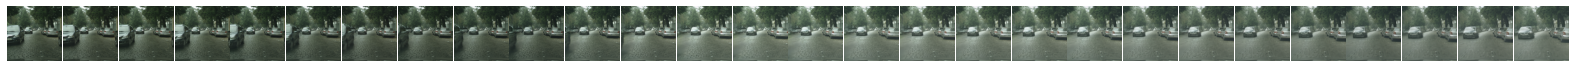

In [22]:
n = 0
plot_model_result(Vo, 'City_Vo_MCVD', 2, n=n, rand_idx = rand_idx, temporal_step=1, renorm_transform=renorm_transform)
plot_model_result(Vp, 'City_Vp_MCVD', 28, n=n, rand_idx = rand_idx, temporal_step=temporal_step, renorm_transform=renorm_transform)
plot_model_result(Preds, 'MCVD_City_Preds_0', 28, n=n, rand_idx = rand_idx, temporal_step=temporal_step, renorm_transform=renorm_transform)

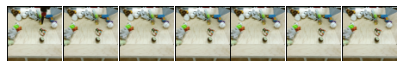

In [11]:
plot_model_result(Preds, 'NPVP_BAIR_Preds_1', 7, n=n, rand_idx = 1, temporal_step=temporal_step, renorm_transform=renorm_transform)

In [ ]:
for n in range(64):
    plot_model_result(Vp, 'BAIR_Vp_NPVP', 7, n=n, rand_idx = rand_idx, temporal_step=temporal_step, renorm_transform=renorm_transform)

## Supplemental Video examples generation

In [20]:
import torch
from matplotlib import pyplot as plt
import torchvision.transforms as transforms
from torch import Tensor
from pathlib import Path
import torchvision.utils as vutils
from PIL import ImageFont
from PIL import ImageDraw 

def load_preds(obj_file):
    """
    Vo_batch: (N, T, C, H, W)
    Vp_batch: (N, T, C, H, W)
    preds_batch: (N, S, T, C, H, W)
    """
    f = torch.load(obj_file)
    Vo_batch, Vp_batch, preds_batch = f['Vo'], f['g_Vp'], f['g_Preds']
    return Vo_batch, Vp_batch, preds_batch

def put_coor_text(clip, sorted_coor, sorted_color_list, renorm_transform=None, text_coor = (0, 0), text_fontsize = 16):
    """
    clip: (N, T, C, H, W)
    return:
        text_clip: (N, T, C, H, W), tensor with temporal coordinate
    """
    imgs = []
    N, T, C, H, W = clip.shape
    if renorm_transform is not None:
        clip = renorm_transform(clip.flatten(0, 1).clone()).reshape(N, T, C, H, W)
        clip = torch.clamp(clip, min = 0., max = 1.0)
    text_clip = []
    for i in range(T):
        frame_i = clip[:, i, ...] #(N, C, H, W)
        #put text on the image
        frame_i_text = []
        for n in range(N):
            x = transforms.ToPILImage()(frame_i[n,...])
            if C == 1:
                x = x.convert('RGB')
            draw = ImageDraw.Draw(x)
            font = ImageFont.load_default()
            #font = ImageFont.truetype("FreeMono.ttf", text_fontsize)
            # draw.text((x, y),"Sample Text",(r,g,b))
            text_color = (255,255,255)
            if sorted_color_list[i] == 1:
                text_color = (255,0,0)
            draw.text((0, 0),f"{sorted_coor[i]:.2f}", fill = text_color, font=font)
            frame_i_text.append(transforms.ToTensor()(x))
        frame_i_text = torch.stack(frame_i_text, dim = 0)
        text_clip.append(frame_i_text)
    text_clip = torch.stack(text_clip, dim=0).permute(1, 0, 2, 3, 4) #(N, T, C, H, W)
    return text_clip

def create_title(clip, text_coor = (0, 0), text_fontsize = 16):
    """
    clip: (S+1, T, C, H, W)
    return:
        text_clip: (S+1, T, C, H, W), tensor with temporal coordinate
    """
    S, T, C, H, W = clip.shape
    text_clip = []
    for i in range(T):
        frame_s = clip[:, i, ...] #(S, C, H, W)
        #put text on the image
        frame_s_text = []
        for s in range(S):
            x = transforms.ToPILImage()(frame_s[s, ...])

            if C == 1:
                x = x.convert('RGB')
            draw = ImageDraw.Draw(x)
            font = ImageFont.load_default()
            text_color = (0,0,0)
            
            pos = (0,0.5*W)
            if s == 0:
                message = 'GT'
            else:
                message = f"Sample {s}"
            _, _, w, h = draw.textbbox((0, 0), message, font=font)
            draw.text(((W-w)/2, (H-h)/2),message, fill = text_color, font=font)
            frame_s_text.append(transforms.ToTensor()(x))
        frame_s_text = torch.stack(frame_s_text, dim = 0)
        text_clip.append(frame_s_text)
    text_clip = torch.stack(text_clip, dim=0).permute(1, 0, 2, 3, 4) #(S+1, T, C, H, W)
    return text_clip

def save_grid_gif_gt_pred(Vo_batch, Vp_batch, preds_batch, observe_coor, pred_coor, file_name, renorm_transform=None, nrow = 1, padding = 4, text_coor = (0, 0), text_fontsize = 16, pad_value = 0.):
    """
    Vo_batch: (N, T, C, H, W)
    Vp_batch: (N, T, C, H, W)
    preds_batch: (N, S, T, C, H, W)
    observe_coor: list of observe coordinates
    pred_coor: list of predict coordinates
    """
    imgs = []
    gt_clip = torch.cat([Vo_batch, Vp_batch], dim = 1)
    sorted_coor = observe_coor + pred_coor
    color_mask = [1]*gt_clip.shape[1]
    for i in range(Vo_batch.shape[1]):
        color_mask[i] = 0
    _, T, C, H, W = gt_clip.shape
    S = preds_batch.shape[1]
    title_clip = torch.ones((S+1, T, C, H, W))
    title_clip = create_title(title_clip)
    title_clips = [title_clip[i, ...] for i in range(S+1)]
    title_clips = torch.cat(title_clips, dim = -1) #(T, C, H, W*(S+1))
    
    
    text_gt_clip = put_coor_text(gt_clip, sorted_coor, [0]*gt_clip.shape[1], renorm_transform, text_coor, text_fontsize)
    text_pred_clips = [put_coor_text(torch.cat([Vo_batch, preds_batch[:, s, ...]], dim=1), sorted_coor, color_mask, renorm_transform, text_coor, text_fontsize) for s in range(preds_batch.shape[1])]
    text_pred_clips.insert(0, text_gt_clip)
    cat_text_clip = torch.cat(text_pred_clips, dim = -1)
    cat_text_clip = torch.cat([title_clips.unsqueeze(0), cat_text_clip], dim = 0)
    for i in range(cat_text_clip.shape[1]):
        frame_i_text = cat_text_clip[:, i, ...]
        img = vutils.make_grid(frame_i_text, nrow = nrow, padding = padding, pad_value = pad_value)
        img = transforms.ToPILImage()(img)
        
        imgs.append(img)

    imgs[0].save(str(Path(file_name).absolute()), save_all = True, append_images = imgs[1:], loop = 0)
    

In [25]:
r_save_path = '/Tmp/sifan/diffusion/CDVP_ckpts/cdvp_kitti_128_sde_autoreg_half_fps/test_ddpm100_sample10_first_10'
preds_files = sorted(list(Path(r_save_path).glob("Preds_*")))

for idx, file in enumerate(preds_files):
    Vo_batch, Vp_batch, preds_batch = load_preds(file)
    print(Vo_batch.shape, Vp_batch.shape, preds_batch.shape)
    
    for n in range(4):
        save_grid_gif_gt_pred(Vo_batch[n*8:(n+1)*8, ...], Vp_batch[n*8:(n+1)*8, ...], preds_batch[n*8:(n+1)*8, ...], list(range(0, 5)), list(range(5,15)), f'STDiff_KITTI_{n+4*idx}.gif')
    

torch.Size([32, 4, 3, 128, 128]) torch.Size([32, 5, 3, 128, 128]) torch.Size([32, 10, 5, 3, 128, 128])
torch.Size([32, 4, 3, 128, 128]) torch.Size([32, 5, 3, 128, 128]) torch.Size([32, 10, 5, 3, 128, 128])
torch.Size([32, 4, 3, 128, 128]) torch.Size([32, 5, 3, 128, 128]) torch.Size([32, 10, 5, 3, 128, 128])
torch.Size([32, 4, 3, 128, 128]) torch.Size([32, 5, 3, 128, 128]) torch.Size([32, 10, 5, 3, 128, 128])
torch.Size([32, 4, 3, 128, 128]) torch.Size([32, 5, 3, 128, 128]) torch.Size([32, 10, 5, 3, 128, 128])
torch.Size([32, 4, 3, 128, 128]) torch.Size([32, 5, 3, 128, 128]) torch.Size([32, 10, 5, 3, 128, 128])
torch.Size([10, 4, 3, 128, 128]) torch.Size([10, 5, 3, 128, 128]) torch.Size([10, 10, 5, 3, 128, 128])


RuntimeError: stack expects a non-empty TensorList

In [15]:
list(range(0, 11))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]